In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# centroid function
def centroid(points: np.ndarray):
  cntd_x = np.sum(points[0, :]) / points.shape[1]
  cntd_y = np.sum(points[1, :]) / points.shape[1]
  return (cntd_x, cntd_y)

In [ ]:
# distance function
# def distance(points: np.ndarray):
#   dist_x = points[0, 1] - points[0, 0]
#   dist_y = points[1, 1] - points[1, 0]
#   return np.sqrt((dist_x ** 2 + dist_y ** 2))

# distance function
def distance(point_1: tuple[float, float], point_2: tuple[float, float]):
  dist_x = point_1[0] - point_2[0]
  dist_y = point_1[1] - point_2[1]
  return np.sqrt((dist_x ** 2 + dist_y ** 2))

distance((0, 0), (1, 1))

1.4142135623730951

In [ ]:
# number of clusters
n = 3

# clustering data
c_data = np.array([[2,3,3,1,5,8,2,5,5,4,8,7],[4,5,7,9,9,2,8,2,3,1,4,1]])
c_data

array([[2, 3, 3, 1, 5, 8, 2, 5, 5, 4, 8, 7],
       [4, 5, 7, 9, 9, 2, 8, 2, 3, 1, 4, 1]])

In [ ]:
# initialize clusters
clusters = list(range(1, n+1))
clusters.extend(np.random.randint(low=1, high=n, size=c_data.shape[1]-n))
random.shuffle(clusters)
clusters = np.array(clusters)

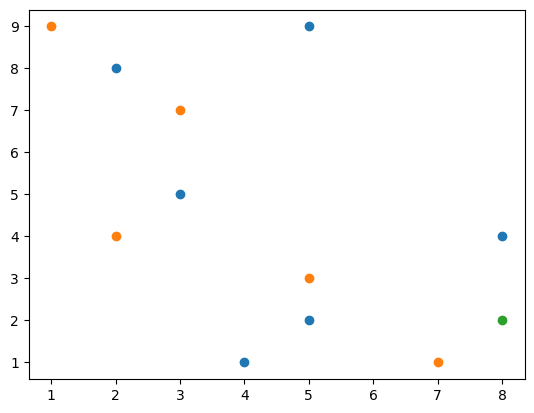

In [ ]:
# visualize data
for i in range(0, n):
    plt.scatter(c_data[0, np.where(clusters == i+1)], c_data[1, np.where(clusters == i+1)], color=f'C{i}')

In [ ]:
# intitialize centroids
centroids = np.zeros(shape=[2, n], dtype=float)
centroids

array([[0., 0., 0.],
       [0., 0., 0.]])

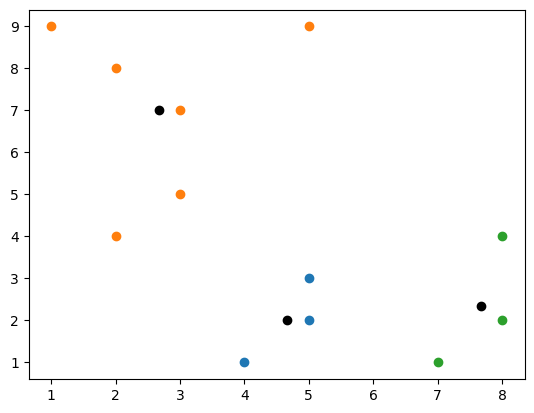

[2 2 2 2 2 3 2 1 1 1 3 3]


In [ ]:
data_size = c_data.shape[1]

for _ in range(0, 5):
  update = False
  # taking centroid of each cluster
  for i in range(0, n):
    cent_x, cent_y = centroid(c_data[:, np.where(clusters == i+1)[0]])
    centroids[0, i] = cent_x
    centroids[1, i] = cent_y

  # edge cases
  if n < 2:
    break

  # reclustering
  for i in range(data_size):
    point_1 = tuple(c_data[:,i])
    current_centroid = tuple(centroids[:, clusters[i]-1])
    current_dist = distance(point_1, current_centroid)

    for j in range(n):
      other_centroid = tuple(centroids[:, j])
      other_dist = distance(point_1, other_centroid)
      if other_dist < current_dist:
        # assign point to the new cluster
        clusters[i] = j+1
        current_dist = other_dist
        update = True

  # breaks loop if nothing was changed
  if update == False:
    break

  # plotting
for i in range(0, centroids.shape[1]):
  plt.scatter(centroids[0, i], centroids[1, i], color='black')
for i in range(0, n):
  plt.scatter(c_data[0, np.where(clusters == i+1)], c_data[1, np.where(clusters == i+1)], color=f'C{i}')
plt.show()

print(clusters)

In [ ]:
error = 0
for i in range(data_size):
  point = tuple(c_data[:,i])
  own_centroid = tuple(centroids[:, clusters[i]-1])
  dist_centroid = distance(point, own_centroid)
  error += dist_centroid
print(error)

18.563616787617487
